In [1265]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from interpret import show
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
#from interpret.data import ClassTabularDataset
from interpret.glassbox import ExplainableBoostingClassifier
pd.set_option('display.max_columns', None)


In [1280]:
df = pd.read_csv('/Users/akamdem/Downloads/urbanicity_target.csv')
#disen = pd.read_csv('/Users/akamdem/Downloads/urbanicity_attributes_breakdown.csv')
disen = pd.read_csv('/Users/akamdem/Downloads/final_segments_overall.csv')
df = df.rename(columns=lambda x: x.strip()) #final_segments_overall
disen = disen.rename(columns=lambda x: x.strip())
df.head(1)

,Urbanicity,Segment,pop_from_web,Population Growth,Population Density,Avg Household Size,Median Age,Median HHI,Interests,Geo View,Neighborhood,Housing Style,Penetration Rate,SUM_Diners,Family_Status,Daytime_Population,tapestry_name,sept23_population,sept23_distinct_monthly_diners,sept23_total_OCP,sept23_monthly_avg_dcp,sept23_total_OCP.1,sept23_monthly_orders,sept23_monthly_avg_ocp,sept23_monthly_avg_dcp.1,sept23_penetration
0,Urban Periphery,City Lights,4774000.0,0.01,3323.0,2.59,39.3,69200.0,passion for social welfare and equal opportuni...,Nationwide,"single-family homes and townhomes, midrise and...",Multiunits; Single Family,0.11,496964.0,Married Couples,4675663.0,City Lights,4898288.0,145701.0,2012256.92,13.81,2012256.92,495235.0,4.06,13.81,0.03


In [1281]:
df.columns

Index(['Urbanicity', 'Segment', 'pop_from_web', 'Population Growth',
       'Population Density', 'Avg Household Size', 'Median Age', 'Median HHI',
       'Interests', 'Geo View', 'Neighborhood', 'Housing Style',
       'Penetration Rate', 'SUM_Diners', 'Family_Status', 'Daytime_Population',
       'tapestry_name', 'sept23_population', 'sept23_distinct_monthly_diners',
       'sept23_total_OCP', 'sept23_monthly_avg_dcp', 'sept23_total_OCP.1',
       'sept23_monthly_orders', 'sept23_monthly_avg_ocp',
       'sept23_monthly_avg_dcp.1', 'sept23_penetration'],
      dtype='object')

In [1282]:
df = df[['Urbanicity','Segment','pop_from_web','Avg Household Size','Median Age','Median HHI','sept23_distinct_monthly_diners','Family_Status']]
df.head(2)

,Urbanicity,Segment,pop_from_web,Avg Household Size,Median Age,Median HHI,sept23_distinct_monthly_diners,Family_Status
0,Urban Periphery,City Lights,4774000.0,2.59,39.3,69200.0,145701.0,Married Couples
1,Urban Periphery,Diverse Convergence,4746200.0,3.07,32.8,46500.0,125644.0,Married Couples


In [1283]:
disen.columns= disen.columns.str.replace(' ','_')
disen.columns

Index(['Urbanicity', 'Segment', 'KMEANS_GROUP', 'pop_from_web',
       'Avg_Household_Size', 'Median_Age', 'Median_HHI',
       'sept23_distinct_monthly_diners', 'Family_Status', 'urbanicity_cluster',
       'Distance_to_Cluster_0', 'Distance_to_Cluster_1', 'Who_We_Are',
       'Our_Neighborhood', 'Socioeconomic_Traits', 'Market_Profile',
       'Interests', 'Geo_View', 'Neighborhood', 'Housing_Style'],
      dtype='object')

In [1285]:
disen = disen[['KMEANS_GROUP','Segment','pop_from_web','Avg_Household_Size','Family_Status','Median_Age','Median_HHI','sept23_distinct_monthly_diners']]
df.Family_Status.value_counts()

Family_Status
Married Couples             39
Singles                     18
Married Couples w/o kids     6
Single Parents               3
Nonform HHs w/ 2+ People     1
Name: count, dtype: int64

In [1286]:
#encoded_df = pd.get_dummies(df, columns=["category"])
# Create a sample DataFrame
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Encode the 'Category' column
#df['Family_Status'] = label_encoder.fit_transform(df['Family_Status'])
disen['Family_Status'] = disen['Family_Status'].replace({'Married Couples':1,'Singles':2,'Married Couples w/o kids':3,'Single Parents':4,'Nonform HHs w/ 2+ People':5})
df['Family_Status'] = df['Family_Status'].replace({'Married Couples':1,'Singles':2,'Married Couples w/o kids':3,'Single Parents':4,'Nonform HHs w/ 2+ People':5})
#disen.Family_Status = label_encoder.fit_transform(df['Family_Status'])
df.Family_Status = df.Family_Status.astype('float64')
disen.Family_Status = disen.Family_Status.astype('float64')


/var/folders/4z/1rd4dz4x7mnbm85c5ppsc6ww0000gq/T/ipykernel_12495/3209560575.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4z/1rd4dz4x7mnbm85c5ppsc6ww0000gq/T/ipykernel_12495/3209560575.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1287]:
#creating two dataframles for each urbanicity 
suburbs = disen[disen['KMEANS_GROUP']=='SUBURB'].reset_index()
urban = disen[disen['KMEANS_GROUP']=='URBAN'].reset_index()

In [1288]:
urban.Family_Status = urban.Family_Status.astype('float64')
suburbs.Family_Status = suburbs.Family_Status.astype('float64')

In [1289]:
#selecting only numeric values
numeric_columns = df.select_dtypes(include=['float64'])
urban_nums = urban.select_dtypes(include=['float64'])
suburban_nums= suburbs.select_dtypes(include=['float64'])

In [1290]:
numeric_columns.columns = numeric_columns.columns.str.replace('_',' ')
urban_nums.head(2)

,Avg_Household_Size,Family_Status,Median_Age
0,1.87,2.0,37.4
1,2.22,5.0,21.6


In [1291]:
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

corr = numeric_columns.corr()
corr.style.background_gradient(cmap='coolwarm')

,pop from web,Avg Household Size,Median Age,Median HHI,sept23 distinct monthly diners,Family Status
pop from web,1.000000,0.107325,0.052814,0.345854,0.003519,-0.413791
Avg Household Size,0.107325,1.000000,-0.482687,0.059096,-0.316664,-0.391560
Median Age,0.052814,-0.482687,1.000000,0.291169,-0.221020,0.036795
Median HHI,0.345854,0.059096,0.291169,1.000000,0.365541,-0.382175
sept23 distinct monthly diners,0.003519,-0.316664,-0.221020,0.365541,1.000000,0.169934
Family Status,-0.413791,-0.391560,0.036795,-0.382175,0.169934,1.000000


# HIGH LEVEL SUBDVISION: 2 CLASSES LEADING TO URBAN & SUBURBAN

In [1292]:
# Specify the number of clusters (2: suburban and urban)
n_clusters = 2
# Create a K-Means model
kmeans = KMeans(n_clusters=n_clusters)
# Fit the model to your data
kmeans.fit(numeric_columns)
# Add cluster labels to your DataFrame
numeric_columns['urbanicity_cluster'] = kmeans.labels_
df['urbanicity_cluster'] = kmeans.labels_
# now have a 'Cluster' column indicating the cluster assignments
# check the results
suburbs.head(2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,index,KMEANS_GROUP,Segment,pop_from_web,Avg_Household_Size,Family_Status,Median_Age,Median_HHI,sept23_distinct_monthly_diners
0,0,SUBURB,Pleasantville,7927600,2.88,1.0,42.6,92900,167877
1,1,SUBURB,Top Tier,6077200,2.84,1.0,47.3,173200,150533


# URBANICITY HIGH LEVEL CENTROID VISUALS

In [1293]:
#initializing centroids to map
# Get cluster labels
labels = kmeans.labels_
# Get cluster centers
centers = kmeans.cluster_centers_
centers

array([[3.32277619e+06, 2.60904762e+00, 3.78547619e+01, 4.78119048e+04,
        7.85963095e+04, 1.85714286e+00],
       [7.33722000e+06, 2.66600000e+00, 4.06760000e+01, 7.29320000e+04,
        7.80530000e+04, 1.28000000e+00]])

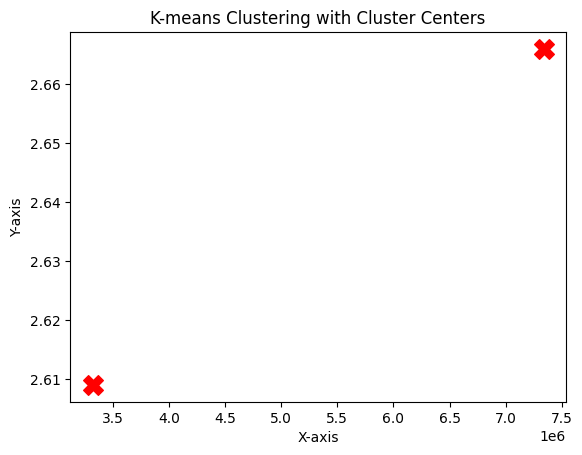

In [1294]:
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red')
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-means Clustering with Cluster Centers')
# Show the plot
plt.show()

## URBANICITY VISUALIZING ALL DATA POINTS

In [1295]:
df.head(1)

,Urbanicity,Segment,pop_from_web,Avg Household Size,Median Age,Median HHI,sept23_distinct_monthly_diners,Family_Status,urbanicity_cluster
0,Urban Periphery,City Lights,4774000.0,2.59,39.3,69200.0,145701.0,1.0,0


## Based on the descriptions of the marketing segments I am providing, group them into one larger segment what is a summary of this segment? what are the segment's interests, what are their neighborhoods like? what marketing message would work well for this segment?: 

In [1296]:
numeric_columns

,pop from web,Avg Household Size,Median Age,Median HHI,sept23 distinct monthly diners,Family Status,urbanicity_cluster
0,4774000.0,2.59,39.3,69200.0,145701.0,1.0,0
1,4746200.0,3.07,32.8,46500.0,125644.0,1.0,0
2,6690700.0,2.41,33.0,54000.0,107691.0,1.0,1
3,6771900.0,2.47,39.0,51800.0,71459.0,1.0,1
4,4700400.0,2.65,29.3,35700.0,62008.0,2.0,0
...,...,...,...,...,...,...,...
62,1966400.0,1.73,45.6,17900.0,69094.0,2.0,0
63,2990300.0,1.88,53.9,40800.0,50312.0,2.0,0
64,6098800.0,2.51,35.5,39300.0,47965.0,2.0,1
65,3047000.0,2.76,28.5,18300.0,41474.0,4.0,0


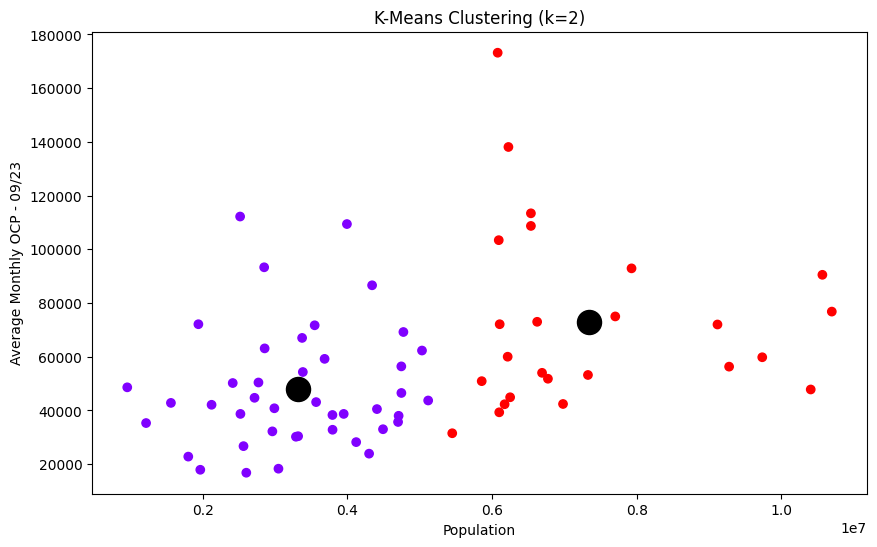

In [1297]:
# Creating a scatter plot to visualize the clusters based on a few features
plt.figure(figsize=(10, 6)) # add this third for bubbly look
plt.scatter(df['pop_from_web'], df['Median HHI'],c=df['urbanicity_cluster'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s=300, c='black', label='Centroids')
plt.title('K-Means Clustering (k=2)')
plt.xlabel('Population')
plt.ylabel('Average Monthly OCP - 09/23')
plt.show()

In [1298]:
numeric_columns.head(1)

,pop from web,Avg Household Size,Median Age,Median HHI,sept23 distinct monthly diners,Family Status,urbanicity_cluster
0,4774000.0,2.59,39.3,69200.0,145701.0,1.0,0


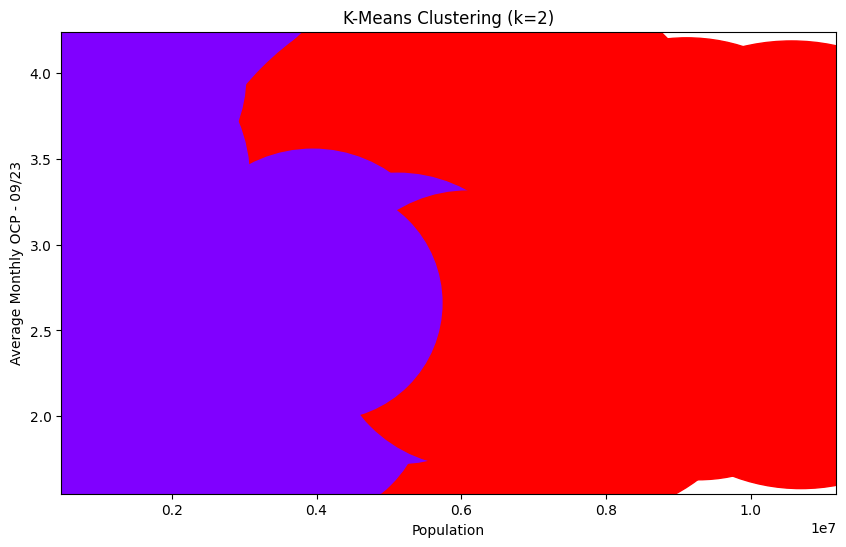

In [1299]:
# Creating a scatter plot to visualize the clusters based on a few features
plt.figure(figsize=(10, 6)) # add this third for bubbly look
plt.scatter(df['pop_from_web'],df['Avg Household Size'],df['Median HHI'],c=df['urbanicity_cluster'], cmap='rainbow')
#plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 15], s=300, c='black', label='Centroids')
plt.title('K-Means Clustering (k=2)')
plt.xlabel('Population')
plt.ylabel('Average Monthly OCP - 09/23')
plt.show()

# URBANICITY HIGH LEVEL Adding distances to the clusters 

In [1300]:
numeric_columns = numeric_columns.drop(columns=['urbanicity_cluster'])

In [1301]:
# Calculate the distances from each data point to the cluster centroids
cluster_distances = kmeans.transform(numeric_columns)
distance_data = pd.DataFrame(cluster_distances, columns=['Distance_to_Cluster_0', 'Distance_to_Cluster_1'])
# Add cluster labels to your DataFrame
#urban['urban_cluster'] = kmeans.labels_
# Add cluster labels to your DataFrame
#urban['urban_cluster'] = kmean
# Concatenate the distance DataFrame with the original DataFrame
urbanicity_with_distances = pd.concat([df, distance_data], axis=1)
# a DataFrame 'suburbs_with_distances' that includes distances to each cluster's centroid
# access these distances using the columns 'Distance_to_Cluster_0' and 'Distance_to_Cluster_1'
# to access the distance of the first data point to Cluster 0:
distance_to_cluster_0 = urbanicity_with_distances.loc[0, 'Distance_to_Cluster_0']

In [1302]:
urbanicity_with_distances['Family_Status'] = urbanicity_with_distances['Family_Status'].replace({1:'Married Couples',2:'Singles',3:'Married Couples w/o kids',4:'Single Parents',5:'Nonform HHs w/ 2+ People'})


In [1303]:
#'Urbanicity','Segment',
urbanicity_with_distances.to_csv('urbanicity_with_distances.csv')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

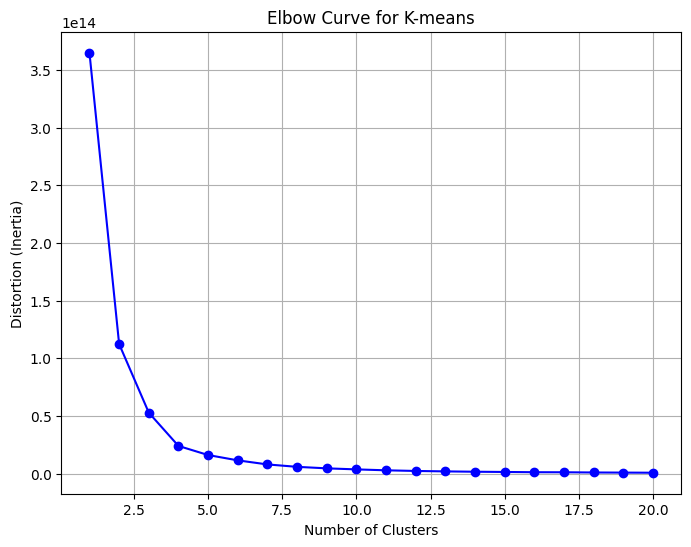

In [1304]:
distortions = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(numeric_columns)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), distortions, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Curve for K-means')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

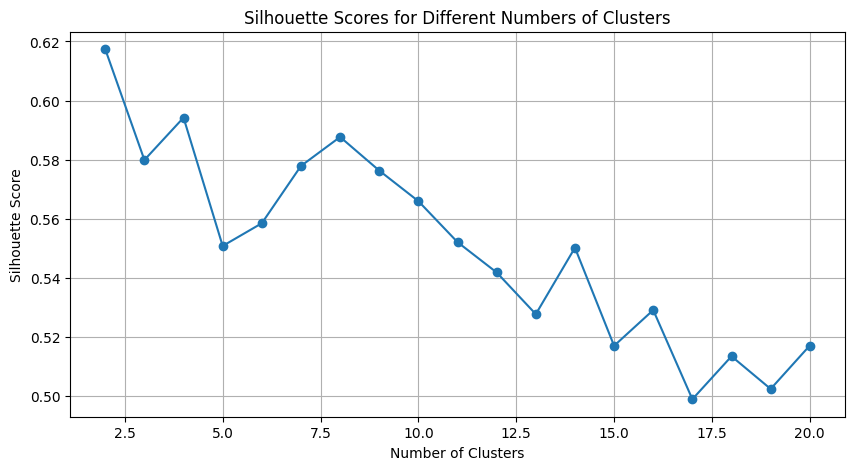

In [1305]:
silhouette_scores = []

# Try different numbers of clusters from 2 to 20
for n_clusters in range(2, 21):
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(numeric_columns)
    
    # Calculate the silhouette score for this clustering
    silhouette_avg = silhouette_score(numeric_columns, cluster_labels)
    
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 21), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# SUBURBAN K MEANS WITH CUSTOM CENTROIDS

In [1398]:
suburbs.head(1)

,index,KMEANS_GROUP,Segment,pop_from_web,Avg_Household_Size,Family_Status,Median_Age,Median_HHI,sept23_distinct_monthly_diners,suburban_cluster
0,0,SUBURB,Pleasantville,7927600,2.88,1.0,42.6,92900,167877,0


In [1312]:
suburbancents = suburbs.sort_values('Segment',ascending=True).reset_index(drop=True)
suburbancents.loc[suburbs['Segment'] == 'City Lights']
suburbancents.head(30)

,index,KMEANS_GROUP,Segment,pop_from_web,Avg_Household_Size,Family_Status,Median_Age,Median_HHI,sept23_distinct_monthly_diners
0,8,SUBURB,Boomburg,6536700,3.25,1.0,34.0,113400,91451
1,5,SUBURB,Bright Young Professionals,6690700,2.41,1.0,33.0,54000,107691
2,12,SUBURB,Comfortable Empty Nesters,7702700,2.52,1.0,48.0,75000,76190
3,10,SUBURB,Exurbanites,6092100,2.50,1.0,51.0,103400,87022
4,16,SUBURB,Green Acres,10695900,2.70,1.0,43.9,76800,62331
5,23,SUBURB,Heartland Communities,6980600,2.39,1.0,42.3,42400,17753
6,15,SUBURB,Home Improvement,6105100,2.88,1.0,37.7,72100,70952
7,6,SUBURB,In Style,6623000,2.35,3.0,42.0,73000,103768
8,13,SUBURB,Middleburg,9734400,2.75,1.0,36.1,59800,74645
9,17,SUBURB,Midlife Constants,7325300,2.31,3.0,47.0,53200,56295


In [1315]:
suburbancents.iloc[20].values.reshape(1, -1) #WORKDAY DRIVE SELECT

array([[1, 'SUBURB', 'Top Tier', 6077200, 2.84, 1.0, 47.3, 173200,
        150533]], dtype=object)

In [1316]:
suburbancents.iloc[5].values.reshape(1, -1) #RUSTBELT SELECT

array([[23, 'SUBURB', 'Heartland Communities', 6980600, 2.39, 1.0, 42.3,
        42400, 17753]], dtype=object)

In [1320]:
suburbancents.head(2)

,index,KMEANS_GROUP,Segment,pop_from_web,Avg_Household_Size,Family_Status,Median_Age,Median_HHI,sept23_distinct_monthly_diners,suburban_cluster
0,8,SUBURB,Boomburg,6536700,3.25,1.0,34.0,113400,91451,1
1,5,SUBURB,Bright Young Professionals,6690700,2.41,1.0,33.0,54000,107691,1


In [1337]:
suburbancents.pop_from_web = suburbancents.pop_from_web.astype('float64')
suburbancents.Median_HHI = suburbancents.Median_HHI.astype('float64')
suburbancents.sept23_distinct_monthly_diners = suburbancents.sept23_distinct_monthly_diners.astype('float64')
suburbancent_num = suburbancents.select_dtypes('float64')
suburbancent_num.head(2)
suburbancent_num.head(2)

,pop_from_web,Avg_Household_Size,Family_Status,Median_Age,Median_HHI,sept23_distinct_monthly_diners
0,6536700.0,3.25,1.0,34.0,113400.0,91451.0
1,6690700.0,2.41,1.0,33.0,54000.0,107691.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



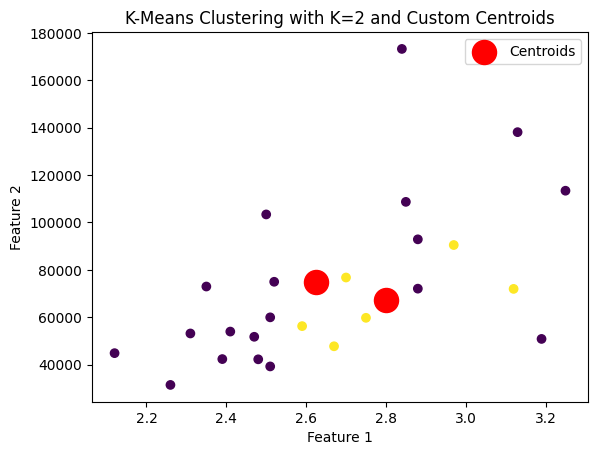

In [1324]:
# Initialize K-Means with K=2 clusters
kmeans = KMeans(n_clusters=2, init="k-means++", random_state=42)

# Set both centroids to specific rows of data
top = suburbancent_num.iloc[24].values.reshape(1, -1)
heartland = suburbancent_num.iloc[15].values.reshape(1, -1)
kmeans.cluster_centers_ = np.vstack((top, heartland))

# Fit the model to your data
kmeans.fit(suburbancent_num)

# Add cluster labels to your DataFrame
#urbancent_num['urban_cluster'] = kmeans.labels_
suburbancents['suburban_cluster'] = kmeans.labels_

# Visualize the clusters with pop_from_web & house size
plt.scatter(suburbancent_num.iloc[:, 1], suburbancent_num.iloc[:, 4], c=suburbancents['suburban_cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,4], s=300, c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with K=2 and Custom Centroids')
plt.legend()
plt.show()

In [1325]:
# Calculate the distances from each data point to the cluster centroids
cluster_distance = kmeans.transform(suburbancent_num)
# Create a DataFrame to store the distances for each cluster
distance_data = pd.DataFrame(cluster_distance, columns=['Distance_to_Cluster_0', 'Distance_to_Cluster_1'])
# Add cluster labels to your DataFrame
#urban['urban_cluster'] = kmean.labels_
# Add cluster labels to your DataFrame
#urban['urban_cluster'] = kmean
# Concatenate the distance DataFrame with the original DataFrame
custom_suburban_with_distances = pd.concat([suburbancent_num, distance_data], axis=1)
custom_suburban_with_distances = pd.concat([suburbancents, distance_data], axis=1)

# a DataFrame 'suburbs_with_distances' that includes distances to each cluster's centroid
# access these distances using the columns 'Distance_to_Cluster_0' and 'Distance_to_Cluster_1'
# to access the distance of the first data point to Cluster 0:
distance_to_cluster_0 = custom_suburban_with_distances.loc[0, 'Distance_to_Cluster_0']

In [1326]:
custom_suburban_with_distances.head(2)

,index,KMEANS_GROUP,Segment,pop_from_web,Avg_Household_Size,Family_Status,Median_Age,Median_HHI,sept23_distinct_monthly_diners,suburban_cluster,Distance_to_Cluster_0,Distance_to_Cluster_1
0,8,SUBURB,Boomburg,6536700.0,3.25,1.0,34.0,113400.0,91451.0,0,49767.520732,3.429097e+06
1,5,SUBURB,Bright Young Professionals,6690700.0,2.41,1.0,33.0,54000.0,107691.0,0,186570.310010,3.274964e+06


In [1327]:
#custom_suburban_with_distances.to_csv('custom_suburban_with_distances.csv')

### ^^^ SUBURBAN K MEANS WITH CUSTOM CENTROIDS ^^^

In [1348]:
suburbancent_num.head(2)

,pop_from_web,Avg_Household_Size,Family_Status,Median_Age,Median_HHI,sept23_distinct_monthly_diners
0,6536700.0,3.25,1.0,34.0,113400.0,91451.0
1,6690700.0,2.41,1.0,33.0,54000.0,107691.0


## SUBURBAN CLUSTERING

In [1387]:
# Specify the number of clusters (2: suburban and urban)
n_clusters = 2
# Create a K-Means model
kmeans = KMeans(n_clusters=n_clusters)
# Fit the model to your data
kmeans.fit(suburbancent_num)
# Add cluster labels to your DataFrame
suburbs['suburban_cluster'] = kmeans.labels_
suburbancent_num['suburban_cluster'] = kmeans.labels_
# now have a 'Cluster' column indicating the cluster assignments
# check the results
suburbs.head(2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,index,KMEANS_GROUP,Segment,pop_from_web,Avg_Household_Size,Family_Status,Median_Age,Median_HHI,sept23_distinct_monthly_diners,suburban_cluster
0,0,SUBURB,Pleasantville,7927600,2.88,1.0,42.6,92900,167877,0
1,1,SUBURB,Top Tier,6077200,2.84,1.0,47.3,173200,150533,0


In [1388]:
kmeans.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1], dtype=int32)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

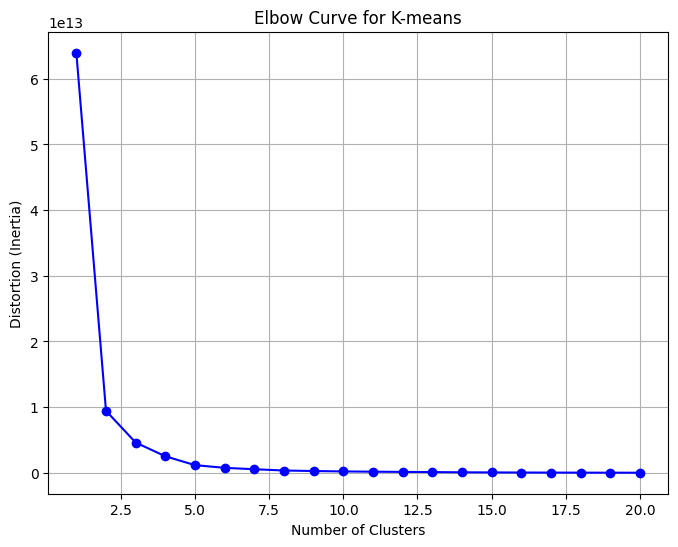

In [1385]:
distortions = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(suburbancent_num)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), distortions, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Curve for K-means')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

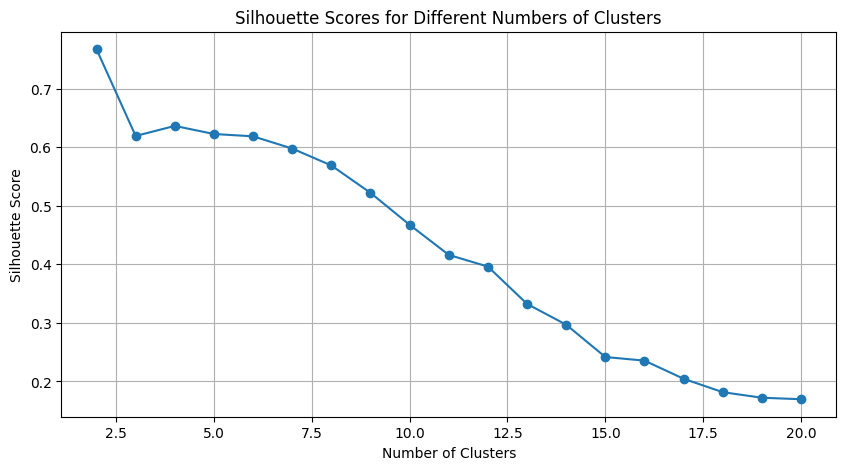

In [1386]:
silhouette_scores = []

# Try different numbers of clusters from 2 to 20
for n_clusters in range(2, 21):
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(suburbancent_num)
    
    # Calculate the silhouette score for this clustering
    silhouette_avg = silhouette_score(suburbancent_num, cluster_labels)
    
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 21), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

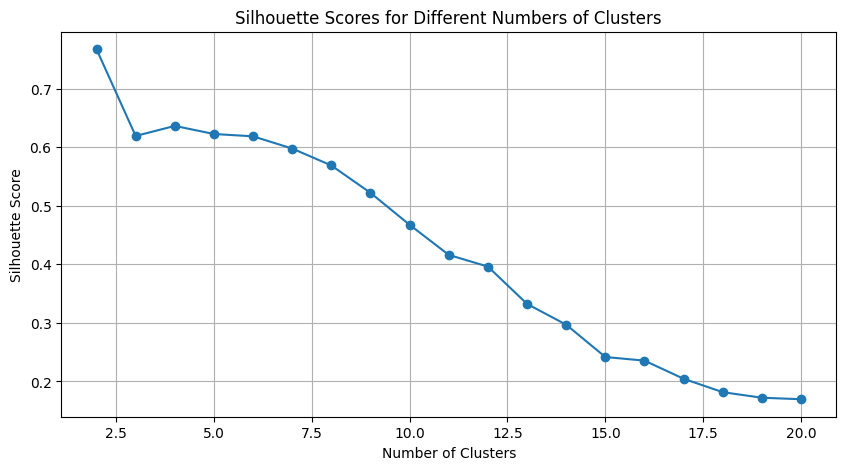

In [1341]:
silhouette_scores = []

# Try different numbers of clusters from 2 to 20
for n_clusters in range(2, 21):
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(suburbancent_num)
    
    # Calculate the silhouette score for this clustering
    silhouette_avg = silhouette_score(suburbancent_num, cluster_labels)
    
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 21), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

## SUBURBAN CENTROID VISUALS

In [1389]:
#initializing centroids to map
# Get cluster labels
labels = kmeans.labels_
# Get cluster centers
centers = kmeans.cluster_centers_
centers


array([[ 6.50726316e+06,  2.62368421e+00,  1.36842105e+00,
         4.12684211e+01,  7.47421053e+04,  8.06878421e+04,
        -1.11022302e-16],
       [ 9.96541667e+06,  2.80000000e+00,  1.00000000e+00,
         3.88000000e+01,  6.72000000e+04,  6.97093333e+04,
         1.00000000e+00]])

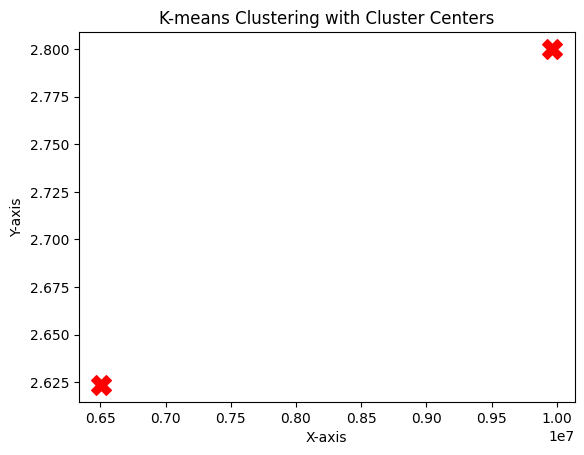

In [1390]:
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red')
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-means Clustering with Cluster Centers')
# Show the plot
plt.show()

## SUBURBAN VISUALIZING ALL DATA POINTS

In [1391]:
suburbancent_num.head(2)

,pop_from_web,Avg_Household_Size,Family_Status,Median_Age,Median_HHI,sept23_distinct_monthly_diners,suburban_cluster
0,6536700.0,3.25,1.0,34.0,113400.0,91451.0,0
1,6690700.0,2.41,1.0,33.0,54000.0,107691.0,0


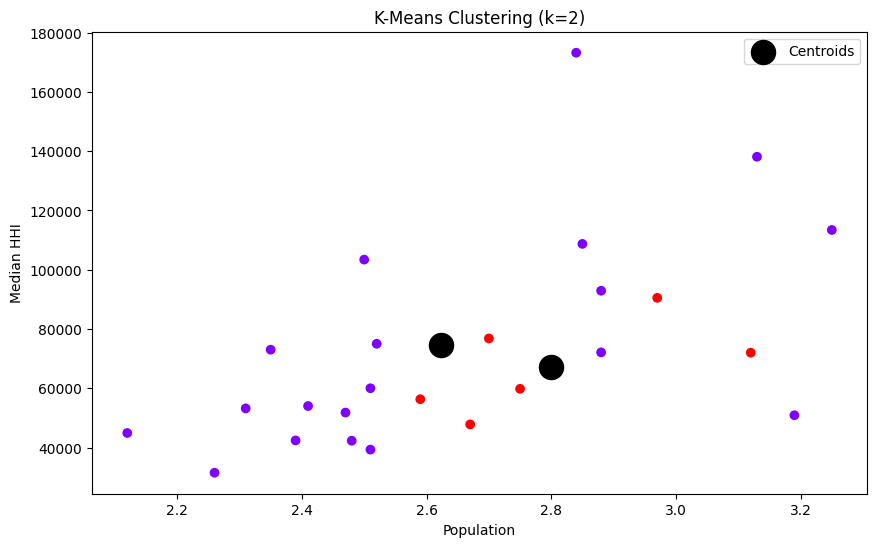

In [1392]:
# Creating a scatter plot to visualize the clusters based on a few features
plt.figure(figsize=(10, 6))
plt.scatter(suburbancent_num['Avg_Household_Size'],  suburbancent_num['Median_HHI'],c=suburbs['suburban_cluster'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 4], s=300, c='black', label='Centroids')
plt.title('K-Means Clustering (k=2)')
plt.xlabel('Population')
plt.ylabel('Median HHI')
plt.legend()
plt.show()

In [1393]:
suburbs.head(1)

,index,KMEANS_GROUP,Segment,pop_from_web,Avg_Household_Size,Family_Status,Median_Age,Median_HHI,sept23_distinct_monthly_diners,suburban_cluster
0,0,SUBURB,Pleasantville,7927600,2.88,1.0,42.6,92900,167877,0


# SUBURBAN Adding distances to the clusters 

In [1362]:
suburbancent_num = suburbancent_num.drop(columns=['suburban_cluster'])

In [1394]:
# Calculate the distances from each data point to the cluster centroids
cluster_distances = kmeans.transform(suburbancent_num)
# Create a DataFrame to store the distances for each cluster
distance_df = pd.DataFrame(cluster_distances, columns=['Distance_to_Cluster_0', 'Distance_to_Cluster_1'])
# Add cluster labels to your DataFrame
suburbs['suburban_cluster'] = kmeans.labels_
# Concatenate the distance DataFrame with the original DataFrame
suburbs_with_distances = pd.concat([suburbs, distance_df], axis=1)

# You now have a DataFrame 'suburbs_with_distances' that includes distances to each cluster's centroid
# You can access these distances using the columns 'Distance_to_Cluster_0' and 'Distance_to_Cluster_1'
# For example, to access the distance of the first data point to Cluster 0:
distance_to_cluster_0 = suburbs_with_distances.loc[0, 'Distance_to_Cluster_0']

In [1395]:
#suburbs_with_distances.columns = numeric_columns.columns.str.replace('_',' ')
suburbs_with_distances['Family_Status'] = suburbs_with_distances['Family_Status'].replace({1:'Married Couples',2:'Singles',3:'Married Couples w/o kids',4:'Single Parents',5:'Nonform HHs w/ 2+ People'})


In [1397]:
suburbs.head()

,index,KMEANS_GROUP,Segment,pop_from_web,Avg_Household_Size,Family_Status,Median_Age,Median_HHI,sept23_distinct_monthly_diners,suburban_cluster
0,0,SUBURB,Pleasantville,7927600,2.88,1.0,42.6,92900,167877,0
1,1,SUBURB,Top Tier,6077200,2.84,1.0,47.3,173200,150533,0
2,2,SUBURB,Savvy Suburbanites,6536700,2.85,1.0,45.1,108700,137579,0
3,3,SUBURB,Workday Drive,10565700,2.97,1.0,37.0,90500,116684,0
4,4,SUBURB,Up & Coming Families,9115600,3.12,1.0,31.4,72000,112721,1


In [1375]:
suburbs_with_distances.to_csv('suburbs_with_distances.csv')

## FORCING ONLY ONE CLUSTER

In [1366]:
suburbancents.iloc[20].values.reshape(1, -1) #WORKDAY DRIVE SELECT

array([[1, 'SUBURB', 'Top Tier', 6077200.0, 2.84, 1.0, 47.3, 173200.0,
        150533.0, 0]], dtype=object)

In [1367]:
suburbancent_num.iloc[24].values.reshape(1, -1) #WORKDAY DRIVE SELECT

array([[1.05657e+07, 2.97000e+00, 1.00000e+00, 3.70000e+01, 9.05000e+04,
        1.16684e+05]])

In [1368]:
# Initialize K-Means with K=2 clusters
kmeans = KMeans(n_clusters=2, init="k-means++", random_state=42)

# Set one centroid to the first row of data
top = suburbancents.iloc[24].values.reshape(1, -1) #WORKDAY DRIVE SELECT
kmeans.cluster_centers_ = top

# Fit the model to your data
kmeans.fit(suburbancent_num)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2, random_state=42)

In [1369]:

# Add cluster labels to your DataFrame
suburbancents['suburban_cluster'] = kmeans.labels_


In [1370]:
suburbancent_num.head(2)

,pop_from_web,Avg_Household_Size,Family_Status,Median_Age,Median_HHI,sept23_distinct_monthly_diners
0,6536700.0,3.25,1.0,34.0,113400.0,91451.0
1,6690700.0,2.41,1.0,33.0,54000.0,107691.0


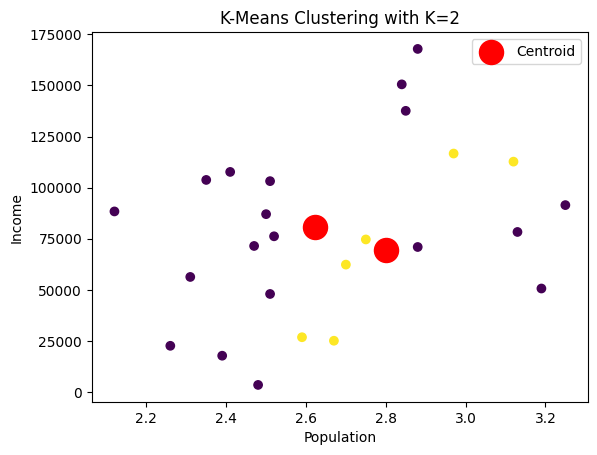

In [1372]:

# Visualize the clusters
plt.scatter(suburbancent_num.iloc[:, 1], suburbancent_num.iloc[:, 5], c=suburbancents['suburban_cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 5], s=300, c='red', label='Centroid')
plt.xlabel('Population')
plt.ylabel('Income')
plt.title('K-Means Clustering with K=2')
plt.legend()
plt.show()

In [1373]:
# Calculate the distances from each data point to the cluster centroids
cluster_distance = kmeans.transform(suburbancent_num)
# Create a DataFrame to store the distances for each cluster
distance_data = pd.DataFrame(cluster_distance, columns=['Distance_to_Cluster_0', 'Distance_to_Cluster_1'])
# Add cluster labels to your DataFrame
#urban['urban_cluster'] = kmean.labels_
# Add cluster labels to your DataFrame
#urban['urban_cluster'] = kmean
# Concatenate the distance DataFrame with the original DataFrame
custom_suburban_with_distances = pd.concat([suburbancent_num, distance_data], axis=1)
custom_suburban_with_distances = pd.concat([suburbancents, distance_data], axis=1)

# a DataFrame 'suburbs_with_distances' that includes distances to each cluster's centroid
# access these distances using the columns 'Distance_to_Cluster_0' and 'Distance_to_Cluster_1'
# to access the distance of the first data point to Cluster 0:
distance_to_cluster_0 = custom_suburban_with_distances.loc[0, 'Distance_to_Cluster_0']

# URBAN K MEANS WITH CUSTOM CENTROIDS

In [721]:
#urbancents.drop(columns=['level_0','index'],inplace=True)

In [722]:
urbancents = urban.sort_values('Segment',ascending=True).reset_index(drop=True)
urbancents.loc[urban['Segment'] == 'City Lights']
urbancents.head(3)

,index,GRUBHUB DEFINED SEGMENT (2 total: Urban & Suburban),Urbanicity,Segment,Interests,Geo View,Neighborhood,Housing Style,Penetration Rate,pop_from_web,Population Growth,Population Density,Avg Household Size,Median Age,Median HHI,SUM_Diners,Family_Status,Daytime Population,tapestry name,sept23 population,sept23 distinct monthly diners,sept23 total OCP,sept23 monthly avg dcp,sept23 monthly orders,sept23 monthly avg ocp,sept23 penetration,cluster,urban_cluster
0,65,URBAN_GH,Metro Area,City Commons,Subscribe to cable TV; children-oriented progr...,Large metropolitan cities in the East,"build pre 1960, single car garage, public tran...","Multiunit Rentals, Single Family",0.06,3047000.0,0.00,988.0,2.76,28.5,18300.0,202602.0,Single Parents,3340787.0,City Commons,2902124.0,41474.0,151156.81,3.64,120215.0,1.26,0.01,URBAN_GH,1
1,25,URBAN_GH,Urban Periphery,City Lights,passion for social welfare and equal opportuni...,Nationwide,"single-family homes and townhomes, midrise and...",Multiunits; Single Family,0.11,4774000.0,0.01,3323.0,2.59,39.3,69200.0,496964.0,Married Couples,4675663.0,City Lights,4898288.0,145701.0,2012256.92,13.81,495235.0,4.06,0.03,URBAN_GH,0
2,38,URBAN_GH,URBAN,City Strivers,image-conscious consumers indulge in pedicures...,"New York, Boston, Washington, or Chicago",Densely populated,High-Density Apartments,0.15,2716200.0,0.01,12938.0,2.78,35.3,44700.0,358893.0,Singles,2336403.0,City Strivers,2769695.0,98615.0,833967.00,8.46,392291.0,2.13,0.04,URBAN_GH,1


In [723]:
urbancents.iloc[20].values.reshape(1, -1) #LAPTOP LATES SELECT

array([[35, 'URBAN_GH', 'URBAN', 'Laptops & Lattes',
        'Stock market, health conscious, environment, nice clothes, dining out, travel, treatments at day spas, and\n lattes at Starbucks',
        'High-rent cities like New York; San Francisco; Chicago; and Washington, DC',
        'City dwellers, primarily in apartment buildings',
        'High-Density Apartments', 0.25, 2517000.0, 0.01, 10463.0, 1.87,
        37.4, 112200.0, 1087245.0, 'Singles', 4381563.0,
        'Laptops and Lattes', 2746635.0, 375666.0, 5737719.79, 15.27,
        1674734.0, 3.43, 0.14, 'URBAN_GH', 0]], dtype=object)

In [724]:
urbancents.iloc[27].values.reshape(1, -1) #PRAIRIE LIVING SELECT

array([[55, 'URBAN_GH', 'Rural', 'Prairie Living', nan, nan, nan, nan,
        0.0, 3384000.0, 0.0, 5.0, 2.51, 44.4, 54300.0, 5003.0,
        'Married Couples', 2705455.0, 'Prairie Living', 3227893.0,
        1119.0, 3431.29, 3.07, 2834.0, 1.21, 0.0, 'URBAN_GH', 1]],
      dtype=object)

In [961]:
urbancent_num = urbancents.select_dtypes('float64')
urbancents.head(2)

,index,GRUBHUB DEFINED SEGMENT (2 total: Urban & Suburban),Urbanicity,Segment,Interests,Geo View,Neighborhood,Housing Style,Penetration Rate,pop_from_web,Population Growth,Population Density,Avg Household Size,Median Age,Median HHI,SUM_Diners,Family_Status,Daytime Population,tapestry name,sept23 population,sept23 distinct monthly diners,sept23 total OCP,sept23 monthly avg dcp,sept23 monthly orders,sept23 monthly avg ocp,sept23 penetration,cluster
0,25,URBAN_GH,Urban Periphery,City Lights,passion for social welfare and equal opportuni...,Nationwide,"single-family homes and townhomes, midrise and...",Multiunits; Single Family,0.11,4774000.0,0.01,3323.0,2.59,39.3,69200.0,496964.0,Married Couples,4675663.0,City Lights,4898288.0,145701.0,2012256.92,13.81,495235.0,4.06,0.03,URBAN_GH
1,26,URBAN_GH,Urban Periphery,Diverse Convergence,Read baby magazines and purchase baby products...,Middle Atlantic (especially in New York and Ne...,"urban periphery of\n large metropolitan areas,...",High-Density Apartments; Single Family,0.11,4746200.0,0.08,8911.0,3.07,32.8,46500.0,443180.0,Married Couples,4137011.0,Diverse Convergence,4680365.0,125644.0,1493178.18,11.88,459553.0,3.25,0.03,URBAN_GH


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



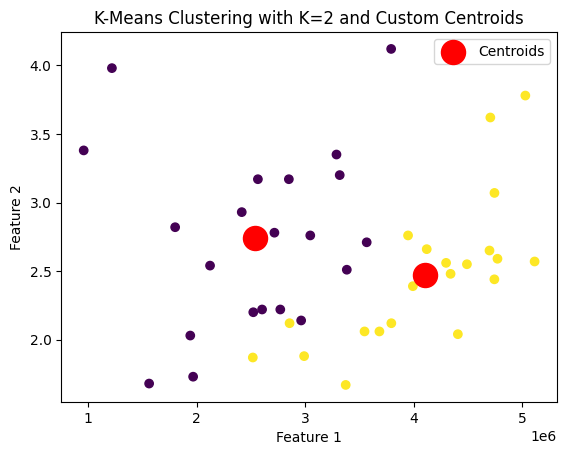

In [962]:
# Initialize K-Means with K=2 clusters
kmeans = KMeans(n_clusters=2, init="k-means++", random_state=42)

# Set both centroids to specific rows of data
laptop = urbancent_num.iloc[20].values.reshape(1, -1)
prairie = urbancent_num.iloc[27].values.reshape(1, -1)
kmeans.cluster_centers_ = np.vstack((laptop, prairie))

# Fit the model to your data
kmeans.fit(urbancent_num)

# Add cluster labels to your DataFrame
#urbancent_num['urban_cluster'] = kmeans.labels_
urbancents['urban_cluster'] = kmeans.labels_

# Visualize the clusters with pop_from_web & house size
plt.scatter(urbancent_num.iloc[:, 1], urbancent_num.iloc[:, 4], c=urbancents['urban_cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 4], s=300, c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with K=2 and Custom Centroids')
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

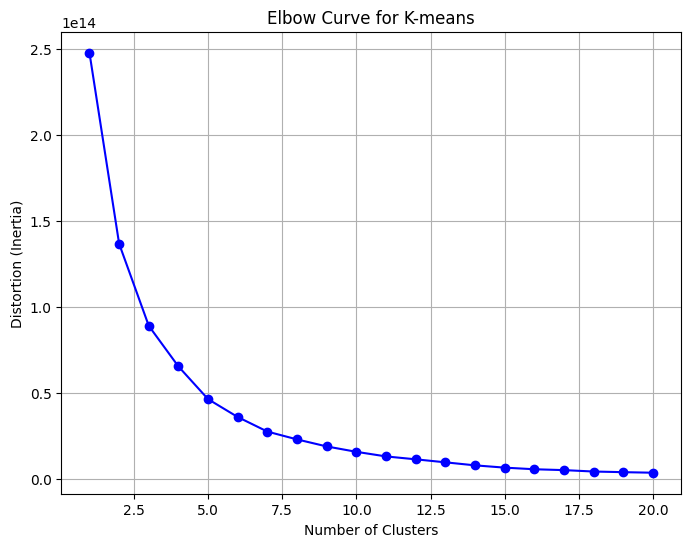

In [946]:
#suburban_nums

distortions = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(urbancent_num)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), distortions, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Curve for K-means')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

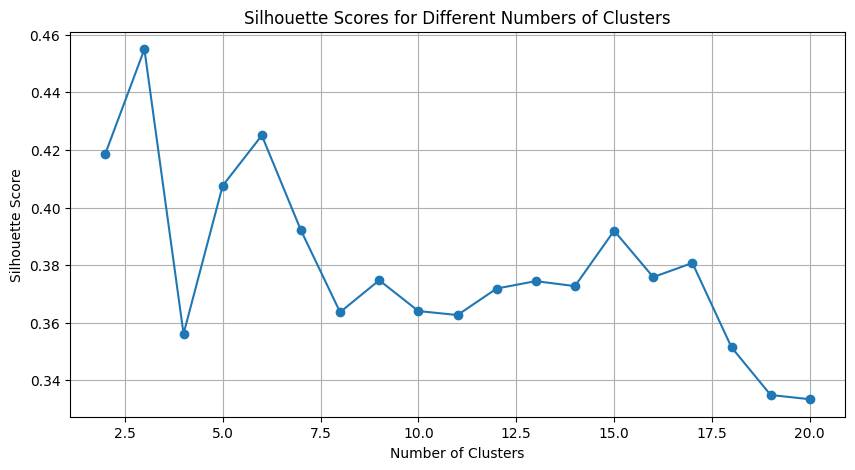

In [951]:
silhouette_scores = []

# Try different numbers of clusters from 2 to 20
for n_clusters in range(2, 21):
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(urbancent_num)
    
    # Calculate the silhouette score for this clustering
    silhouette_avg = silhouette_score(urbancent_num, cluster_labels)
    
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 21), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [741]:
urbancents.iloc[:, 14] #9,12,13,14
urbancent_num.iloc[:, 1]
#urbancent_num.urban_cluster.value_counts()
#urbancent_num =urbancent_num.drop(columns=['urban_cluster'])
urbancent_num.head(2)

,Penetration Rate,pop_from_web,Population Growth,Population Density,Avg Household Size,Median Age,Median HHI,SUM_Diners,Daytime Population,sept23 population,sept23 distinct monthly diners,sept23 total OCP,sept23 monthly avg dcp,sept23 monthly orders,sept23 monthly avg ocp,sept23 penetration
0,0.06,3047000.0,0.00,988.0,2.76,28.5,18300.0,202602.0,3340787.0,2902124.0,41474.0,151156.81,3.64,120215.0,1.26,0.01
1,0.11,4774000.0,0.01,3323.0,2.59,39.3,69200.0,496964.0,4675663.0,4898288.0,145701.0,2012256.92,13.81,495235.0,4.06,0.03


In [742]:
urbancent_num.head(2)

,Penetration Rate,pop_from_web,Population Growth,Population Density,Avg Household Size,Median Age,Median HHI,SUM_Diners,Daytime Population,sept23 population,sept23 distinct monthly diners,sept23 total OCP,sept23 monthly avg dcp,sept23 monthly orders,sept23 monthly avg ocp,sept23 penetration
0,0.06,3047000.0,0.00,988.0,2.76,28.5,18300.0,202602.0,3340787.0,2902124.0,41474.0,151156.81,3.64,120215.0,1.26,0.01
1,0.11,4774000.0,0.01,3323.0,2.59,39.3,69200.0,496964.0,4675663.0,4898288.0,145701.0,2012256.92,13.81,495235.0,4.06,0.03


In [746]:
# Calculate the distances from each data point to the cluster centroids
cluster_distance = kmeans.transform(urbancent_num)
# Create a DataFrame to store the distances for each cluster
distance_data = pd.DataFrame(cluster_distance, columns=['Distance_to_Cluster_0', 'Distance_to_Cluster_1'])
# Add cluster labels to your DataFrame
#urban['urban_cluster'] = kmean.labels_
# Add cluster labels to your DataFrame
#urban['urban_cluster'] = kmean
# Concatenate the distance DataFrame with the original DataFrame
custom_urban_with_distances = pd.concat([urbancent_num, distance_data], axis=1)
custom_urban_with_distances = pd.concat([urbancents, distance_data], axis=1)

# a DataFrame 'suburbs_with_distances' that includes distances to each cluster's centroid
# access these distances using the columns 'Distance_to_Cluster_0' and 'Distance_to_Cluster_1'
# to access the distance of the first data point to Cluster 0:
distance_to_cluster_0 = suburbs_with_distances.loc[0, 'Distance_to_Cluster_0']

In [747]:
custom_urban_with_distances.head(2)

,index,GRUBHUB DEFINED SEGMENT (2 total: Urban & Suburban),Urbanicity,Segment,Interests,Geo View,Neighborhood,Housing Style,Penetration Rate,pop_from_web,Population Growth,Population Density,Avg Household Size,Median Age,Median HHI,SUM_Diners,Family_Status,Daytime Population,tapestry name,sept23 population,sept23 distinct monthly diners,sept23 total OCP,sept23 monthly avg dcp,sept23 monthly orders,sept23 monthly avg ocp,sept23 penetration,cluster,urban_cluster,Distance_to_Cluster_0,Distance_to_Cluster_1
0,65,URBAN_GH,Metro Area,City Commons,Subscribe to cable TV; children-oriented progr...,Large metropolitan cities in the East,"build pre 1960, single car garage, public tran...","Multiunit Rentals, Single Family",0.06,3047000.0,0.00,988.0,2.76,28.5,18300.0,202602.0,Single Parents,3340787.0,City Commons,2902124.0,41474.0,151156.81,3.64,120215.0,1.26,0.01,URBAN_GH,0,9.009483e+05,2.494252e+06
1,25,URBAN_GH,Urban Periphery,City Lights,passion for social welfare and equal opportuni...,Nationwide,"single-family homes and townhomes, midrise and...",Multiunits; Single Family,0.11,4774000.0,0.01,3323.0,2.59,39.3,69200.0,496964.0,Married Couples,4675663.0,City Lights,4898288.0,145701.0,2012256.92,13.81,495235.0,4.06,0.03,URBAN_GH,1,4.209088e+06,1.231519e+06


## ^^^URBAN K MEANS WITH CUSTOM CENTROIDS^^^^

# REGULAR URBAN CLUSTERING

In [1376]:
# Assuming you have a DataFrame named 'data' with your attributes
# Replace 'data' with the actual name of your DataFrame
# Specify the number of clusters (2 in your case: suburban and urban)
n_clusters = 2
# Create a K-Means model
kmean = KMeans(n_clusters=n_clusters)
# Fit the model to your data
kmean.fit(urban_nums)
# Add cluster labels to your DataFrame
urban['urban_cluster'] = kmean.labels_
# You now have a 'Cluster' column indicating the cluster assignments
# You can check the results
#urban=urban.drop(columns=['suburban_cluster'])
urban.head(2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,index,KMEANS_GROUP,Segment,pop_from_web,Avg_Household_Size,Family_Status,Median_Age,Median_HHI,sept23_distinct_monthly_diners,urban_cluster
0,25,URBAN,Laptops & Lattes,2517000,1.87,2.0,37.4,112200,375666,0
1,26,URBAN,Dorms to Diplomas,2602400,2.22,5.0,21.6,16800,327295,0


# URBAN CENTROID VISUALS

In [1377]:
#initializing centroids to map
# Get cluster labels
label = kmean.labels_
# Get cluster centers
center = kmean.cluster_centers_
center


array([[ 2.76375,  1.78125, 33.0875 ],
       [ 2.114  ,  2.1    , 53.11   ]])

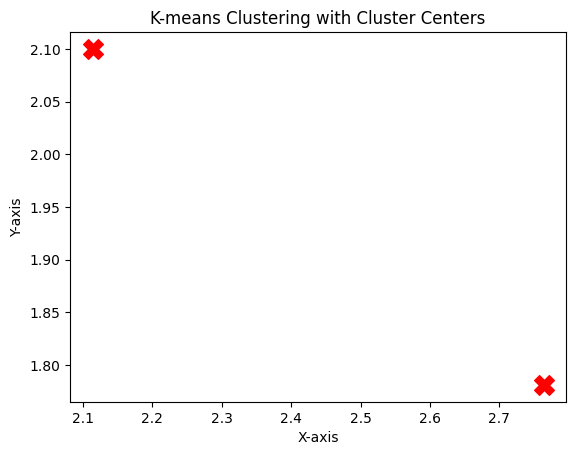

In [1378]:
plt.scatter(center[:, 0], center[:, 1], marker='X', s=200, c='red')
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-means Clustering with Cluster Centers')

# Show the plot
plt.show()

# URBAN VISUALIZING URBAN DATA POINTS

In [1380]:
urban_nums.head(1)

,Avg_Household_Size,Family_Status,Median_Age
0,1.87,2.0,37.4


In [1381]:
urban.head(1)

,index,KMEANS_GROUP,Segment,pop_from_web,Avg_Household_Size,Family_Status,Median_Age,Median_HHI,sept23_distinct_monthly_diners,urban_cluster
0,25,URBAN,Laptops & Lattes,2517000,1.87,2.0,37.4,112200,375666,0


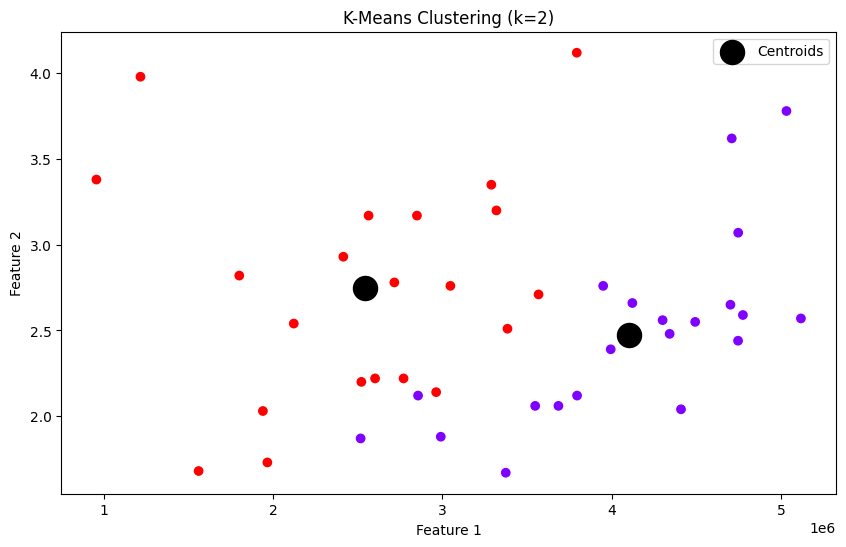

In [968]:
# Creating a scatter plot to visualize the clusters based on a few features
plt.figure(figsize=(10, 6))  # urban['sept23 monthly avg ocp'], , urban['Population Density']
plt.scatter(urban['pop_from_web'], urban['Avg_Household_Size'],c=urban['urban_cluster'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 4], s=300, c='black', label='Centroids')
plt.title('K-Means Clustering (k=2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# URBAN Adding distances to the clusters 

In [799]:
# Calculate the distances from each data point to the cluster centroids
cluster_distance = kmean.transform(urban_nums)
# Create a DataFrame to store the distances for each cluster
distance_data = pd.DataFrame(cluster_distance, columns=['Distance_to_Cluster_0', 'Distance_to_Cluster_1'])
# Add cluster labels to your DataFrame
urban['urban_cluster'] = kmean.labels_
# Add cluster labels to your DataFrame
#urban['urban_cluster'] = kmean
# Concatenate the distance DataFrame with the original DataFrame
urban_with_distances = pd.concat([urban, distance_data], axis=1)
# a DataFrame 'suburbs_with_distances' that includes distances to each cluster's centroid
# access these distances using the columns 'Distance_to_Cluster_0' and 'Distance_to_Cluster_1'
# to access the distance of the first data point to Cluster 0:
distance_to_cluster_0 = suburbs_with_distances.loc[0, 'Distance_to_Cluster_0']

In [956]:
108705+ 3172

111877

In [800]:
urban_with_distances.head(2)

,index,GRUBHUB DEFINED SEGMENT (2 total: Urban & Suburban),Urbanicity,Segment,Interests,Geo View,Neighborhood,Housing Style,Penetration Rate,pop_from_web,Population Growth,Population Density,Avg Household Size,Median Age,Median HHI,SUM_Diners,Family_Status,Daytime Population,tapestry name,sept23 population,sept23 distinct monthly diners,sept23 total OCP,sept23 monthly avg dcp,sept23 monthly orders,sept23 monthly avg ocp,sept23 penetration,cluster,urban_cluster,Distance_to_Cluster_0,Distance_to_Cluster_1
0,25,URBAN_GH,Urban Periphery,City Lights,passion for social welfare and equal opportuni...,Nationwide,"single-family homes and townhomes, midrise and...",Multiunits; Single Family,0.11,4774000.0,0.01,3323.0,2.59,39.3,69200.0,496964.0,Married Couples,4675663.0,City Lights,4898288.0,145701.0,2012256.92,13.81,495235.0,4.06,0.03,URBAN_GH,0,1.231519e+06,4.209088e+06
1,26,URBAN_GH,Urban Periphery,Diverse Convergence,Read baby magazines and purchase baby products...,Middle Atlantic (especially in New York and Ne...,"urban periphery of\n large metropolitan areas,...",High-Density Apartments; Single Family,0.11,4746200.0,0.08,8911.0,3.07,32.8,46500.0,443180.0,Married Couples,4137011.0,Diverse Convergence,4680365.0,125644.0,1493178.18,11.88,459553.0,3.25,0.03,URBAN_GH,0,1.053037e+06,3.634508e+06


In [801]:
urban_with_distances.to_csv('urban_with_distances.csv')
suburbs_with_distances.to_csv('suburbs_with_distances.csv')

In [802]:
kmeans.fit(suburban_nums)
labels = kmeans.predict(suburban_nums)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [803]:
#provides the centroids for each label
centroids  = kmeans.cluster_centers_
centroid_labels = [centroids[i] for i in labels]
centroid_labels

[array([5.16666667e-02, 6.50562778e+06, 7.77777778e-03, 5.44295000e+02,
        2.61111111e+00, 4.10555556e+01, 7.28555556e+04, 3.35689222e+05,
        6.40473472e+06, 6.67747172e+06, 7.75272222e+04, 9.14064951e+05,
        9.79833333e+00, 2.18910556e+05, 3.51500000e+00, 1.11111111e-02]),
 array([5.16666667e-02, 6.50562778e+06, 7.77777778e-03, 5.44295000e+02,
        2.61111111e+00, 4.10555556e+01, 7.28555556e+04, 3.35689222e+05,
        6.40473472e+06, 6.67747172e+06, 7.75272222e+04, 9.14064951e+05,
        9.79833333e+00, 2.18910556e+05, 3.51500000e+00, 1.11111111e-02]),
 array([5.16666667e-02, 6.50562778e+06, 7.77777778e-03, 5.44295000e+02,
        2.61111111e+00, 4.10555556e+01, 7.28555556e+04, 3.35689222e+05,
        6.40473472e+06, 6.67747172e+06, 7.75272222e+04, 9.14064951e+05,
        9.79833333e+00, 2.18910556e+05, 3.51500000e+00, 1.11111111e-02]),
 array([5.16666667e-02, 6.50562778e+06, 7.77777778e-03, 5.44295000e+02,
        2.61111111e+00, 4.10555556e+01, 7.28555556e+04, 3.

In [804]:
suburban_nums.head(2) #9 25

,Penetration Rate,pop_from_web,Population Growth,Population Density,Avg Household Size,Median Age,Median HHI,SUM_Diners,Daytime Population,sept23 population,sept23 distinct monthly diners,sept23 total OCP,sept23 monthly avg dcp,sept23 monthly orders,sept23 monthly avg ocp,sept23 penetration
0,0.07,6690700.0,0.01,778.0,2.41,33.0,54000.0,508412.0,7210151.0,7203509.0,107691.0,915163.04,8.50,323366.0,2.83,0.01
1,0.06,6771900.0,0.00,661.0,2.47,39.0,51800.0,334059.0,5993402.0,6788611.0,71459.0,663453.73,9.28,210959.0,3.14,0.01


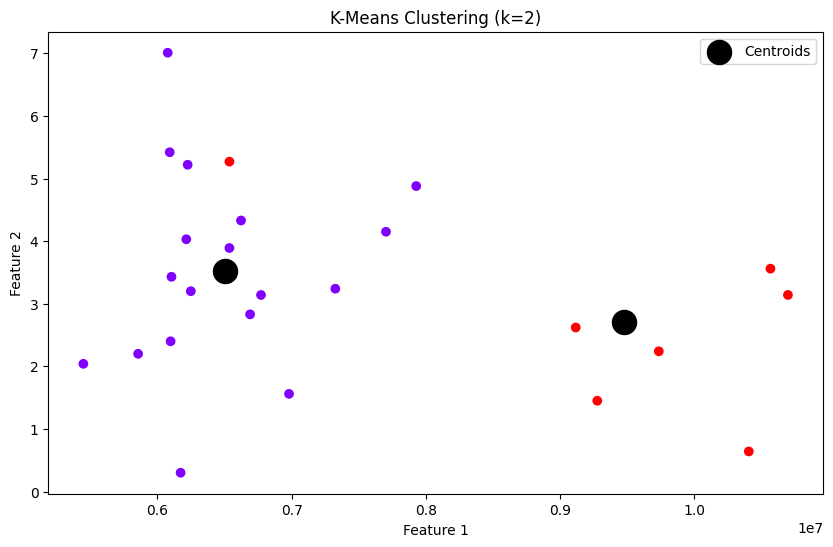

In [811]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(suburbs['pop_from_web'], suburbs['sept23 monthly avg ocp'], c=suburbs['suburban_cluster'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 14], s=300, c='black', label='Centroids')
plt.title('K-Means Clustering (k=2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [807]:
# Calculate the distances from each data point to the cluster centroids
cluster_distances = kmeans.transform(suburban_nums)
# Create a DataFrame to store the distances for each cluster
distance_df = pd.DataFrame(cluster_distances, columns=['Distance_to_Cluster_0', 'Distance_to_Cluster_1'])
# Add cluster labels to your DataFrame
suburbs['suburban_cluster'] = kmeans.labels_
# Concatenate the distance DataFrame with the original DataFrame
suburbs_with_distances = pd.concat([suburbs, distance_df], axis=1)
# You now have a DataFrame 'suburbs_with_distances' that includes distances to each cluster's centroid
# You can access these distances using the columns 'Distance_to_Cluster_0' and 'Distance_to_Cluster_1'
# For example, to access the distance of the first data point to Cluster 0:
distance_to_cluster_0 = suburbs_with_distances.loc[0, 'Distance_to_Cluster_0']

In [808]:
suburbs_with_distances.head(2)

,index,GRUBHUB DEFINED SEGMENT (2 total: Urban & Suburban),Urbanicity,Segment,Interests,Geo View,Neighborhood,Housing Style,Penetration Rate,pop_from_web,Population Growth,Population Density,Avg Household Size,Median Age,Median HHI,SUM_Diners,Family_Status,Daytime Population,tapestry name,sept23 population,sept23 distinct monthly diners,sept23 total OCP,sept23 monthly avg dcp,sept23 monthly orders,sept23 monthly avg ocp,sept23 penetration,cluster,suburban_cluster,Distance_to_Cluster_0,Distance_to_Cluster_1
0,0,SUBURB_GH,Urban Periphery,Bright Young Professionals,physically active and up to the latest in tech...,Nationwide,urban outskirts of large metropolitan areas,"Single Family, Multi-Inits",0.07,6690700.0,0.01,778.0,2.41,33.0,54000.0,508412.0,Married Couples,7210151.0,Bright Young Professionals,7203509.0,107691.0,915163.04,8.50,323366.0,2.83,0.01,SUBURB_GH,0,1.000836e+06,4.766407e+06
1,1,SUBURB_GH,Urban Periphery,Rustbelt Traditions,Watching television is a common pastime;,states surrounding the Great Lakes,NaN,Midwest,0.06,6771900.0,0.00,661.0,2.47,39.0,51800.0,334059.0,Married Couples,5993402.0,Rustbelt Traditions,6788611.0,71459.0,663453.73,9.28,210959.0,3.14,0.01,SUBURB_GH,0,5.619604e+05,5.480984e+06


In [809]:
#suburbs.to_csv('suburban_clusters.csv')
#urban.to_csv('urban_clusters.csv')

In [810]:
suburbs.suburban_cluster.value_counts()

suburban_cluster
0    18
1     7
Name: count, dtype: int64

# PRINTING HIGH LEVEL

In [767]:
import pandas as pd
from sklearn.cluster import KMeans
# Assuming you have a DataFrame named 'data' with your attributes
# Replace 'data' with the actual name of your DataFrame
# Specify the number of clusters (2 in your case: suburban and urban)
n_clusters = 2
# Create a K-Means model
kmeans = KMeans(n_clusters=n_clusters)
# Fit the model to your data
kmeans.fit(numeric_columns)
# Add cluster labels to your DataFrame
df['cluster'] = kmeans.labels_
# You now have a 'Cluster' column indicating the cluster assignments
# You can check the results
print(df)

         Urbanicity                     Segment  pop_from_web  \
0   Urban Periphery                 City Lights     4774000.0   
1   Urban Periphery         Diverse Convergence     4746200.0   
2   Urban Periphery  Bright Young Professionals     6690700.0   
3   Urban Periphery         Rustbelt Traditions     6771900.0   
4   Urban Periphery                Metro Fusion     4700400.0   
..              ...                         ...           ...   
62       Metro Area         Social Security Set     1966400.0   
63       Metro Area      Retirement Communities     2990300.0   
64       Metro Area          Traditional Living     6098800.0   
65       Metro Area                City Commons     3047000.0   
66       Metro Area           Hometown Heritage     4121300.0   

    Population Growth  Population Density  Avg Household Size  Median Age  \
0                0.01              3323.0                2.59        39.3   
1                0.08              8911.0                3.07    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [768]:
df.cluster = df.cluster.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Urbanicity                      67 non-null     object 
 1   Segment                         67 non-null     object 
 2   pop_from_web                    67 non-null     float64
 3   Population Growth               67 non-null     float64
 4   Population Density              67 non-null     float64
 5   Avg Household Size              67 non-null     float64
 6   Median Age                      67 non-null     float64
 7   Median HHI                      67 non-null     float64
 8   Interests                       45 non-null     object 
 9   Geo View                        42 non-null     object 
 10  Neighborhood                    42 non-null     object 
 11  Housing Style                   44 non-null     object 
 12  Penetration Rate                67 non

In [769]:
#df.replace({0: "GH_SUBURB", 1: 'GH_URBAN'})
numeric = df.select_dtypes(include=['float64'])
numeric

,pop_from_web,Population Growth,Population Density,Avg Household Size,Median Age,Median HHI,Penetration Rate,SUM_Diners,Daytime_Population,sept23_population,sept23_distinct_monthly_diners,sept23_total_OCP,sept23_monthly_avg_dcp,sept23_total_OCP.1,sept23_monthly_orders,sept23_monthly_avg_ocp,sept23_monthly_avg_dcp.1,sept23_penetration,cluster
0,4774000.0,0.01,3323.0,2.59,39.3,69200.0,0.11,496964.0,4675663.0,4898288.0,145701.0,2012256.92,13.81,2012256.92,495235.0,4.06,13.81,0.03,0.0
1,4746200.0,0.08,8911.0,3.07,32.8,46500.0,0.11,443180.0,4137011.0,4680365.0,125644.0,1493178.18,11.88,1493178.18,459553.0,3.25,11.88,0.03,0.0
2,6690700.0,0.01,778.0,2.41,33.0,54000.0,0.07,508412.0,7210151.0,7203509.0,107691.0,915163.04,8.50,915163.04,323366.0,2.83,8.50,0.01,1.0
3,6771900.0,0.00,661.0,2.47,39.0,51800.0,0.06,334059.0,5993402.0,6788611.0,71459.0,663453.73,9.28,663453.73,210959.0,3.14,9.28,0.01,1.0
4,4700400.0,0.00,2663.0,2.65,29.3,35700.0,0.06,312181.0,4991589.0,4813828.0,62008.0,391211.93,6.31,391211.93,189319.0,2.07,6.31,0.01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1966400.0,0.01,1243.0,1.73,45.6,17900.0,0.05,271756.0,5212048.0,2156715.0,69094.0,641210.32,9.28,641210.32,202952.0,3.16,9.28,0.03,0.0
63,2990300.0,0.01,420.0,1.88,53.9,40800.0,0.05,218282.0,4744749.0,3198224.0,50312.0,510868.85,10.15,510868.85,152195.0,3.36,10.15,0.02,0.0
64,6098800.0,0.00,231.0,2.51,35.5,39300.0,0.04,243697.0,5798990.0,5995965.0,47965.0,339909.15,7.09,339909.15,141596.0,2.40,7.09,0.01,1.0
65,3047000.0,0.00,988.0,2.76,28.5,18300.0,0.06,202602.0,3340787.0,2902124.0,41474.0,151156.81,3.64,151156.81,120215.0,1.26,3.64,0.01,0.0


In [770]:

# To see the count of each cluster
numeric.groupby('cluster').mean().to_csv('/Users/akamdem/Downloads/tapestry_GH_binary.csv')

In [771]:
df.cluster = df.cluster.replace({0: "SUBURB_GH", 1: 'URBAN_GH'})
df.head(2)

,Urbanicity,Segment,pop_from_web,Population Growth,Population Density,Avg Household Size,Median Age,Median HHI,Interests,Geo View,Neighborhood,Housing Style,Penetration Rate,SUM_Diners,Family_Status,Daytime_Population,tapestry_name,sept23_population,sept23_distinct_monthly_diners,sept23_total_OCP,sept23_monthly_avg_dcp,sept23_total_OCP.1,sept23_monthly_orders,sept23_monthly_avg_ocp,sept23_monthly_avg_dcp.1,sept23_penetration,urbanicity_cluster,cluster
0,Urban Periphery,City Lights,4774000.0,0.01,3323.0,2.59,39.3,69200.0,passion for social welfare and equal opportuni...,Nationwide,"single-family homes and townhomes, midrise and...",Multiunits; Single Family,0.11,496964.0,Married Couples,4675663.0,City Lights,4898288.0,145701.0,2012256.92,13.81,2012256.92,495235.0,4.06,13.81,0.03,0,SUBURB_GH
1,Urban Periphery,Diverse Convergence,4746200.0,0.08,8911.0,3.07,32.8,46500.0,Read baby magazines and purchase baby products...,Middle Atlantic (especially in New York and Ne...,"urban periphery of\nlarge metropolitan areas, ...",High-Density Apartments; Single Family,0.11,443180.0,Married Couples,4137011.0,Diverse Convergence,4680365.0,125644.0,1493178.18,11.88,1493178.18,459553.0,3.25,11.88,0.03,0,SUBURB_GH
2,Urban Periphery,Bright Young Professionals,6690700.0,0.01,778.0,2.41,33.0,54000.0,physically active and up to the latest in tech...,Nationwide,urban outskirts of large metropolitan areas,"Single Family, Multi-Inits",0.07,508412.0,Married Couples,7210151.0,Bright Young Professionals,7203509.0,107691.0,915163.04,8.50,915163.04,323366.0,2.83,8.50,0.01,1,URBAN_GH
3,Urban Periphery,Rustbelt Traditions,6771900.0,0.00,661.0,2.47,39.0,51800.0,Watching television is a common pastime;,states surrounding the Great Lakes,NaN,Midwest,0.06,334059.0,Married Couples,5993402.0,Rustbelt Traditions,6788611.0,71459.0,663453.73,9.28,663453.73,210959.0,3.14,9.28,0.01,1,URBAN_GH
4,Urban Periphery,Metro Fusion,4700400.0,0.00,2663.0,2.65,29.3,35700.0,"Football and weight lifting, Often eat frozen ...",Nationwide,urban periphery,Multiunits; Single Family,0.06,312181.0,Singles,4991589.0,Metro Fusion,4813828.0,62008.0,391211.93,6.31,391211.93,189319.0,2.07,6.31,0.01,0,SUBURB_GH


In [772]:
#df.to_csv('/Users/akamdem/Downloads/tapestry_GH_segments.csv')

# MODELING

In [ ]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [674]:
df2 = df[['Urbanicity','Population Growth','Avg Household Size','Median Age','Interests','Geo View','Neighborhood','Housing Style','sept23_distinct_monthly_diners','sept23_total_OCP','sept23_monthly_avg_dcp','sept23_monthly_orders','sept23_monthly_avg_ocp']]

In [369]:
# Load your dataset into a DataFrame (replace 'your_data.csv' with your file path)
#data = pd.read_csv('your_data.csv')
# Split the data into features (X) and the target variable (y)
X = df2.drop(columns=['Urbanicity'])
y = df2['Urbanicity']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [370]:
ebc = ExplainableBoostingClassifier(random_state=42)
# Train the model on the training data
ebc.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/interpret/glassbox/_ebm/_ebm.py:669: UserWarning:

Missing values detected. Our visualizations do not currently display missing values. To retain the glassbox nature of the model you need to either set the missing values to an extreme value like -1000 that will be visible on the graphs, or manually examine the missing value score in ebm.term_scores_[term_index][0]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/interpret/glassbox/_ebm/_ebm.py:933: UserWarning:

Detected multiclass problem. Forcing interactions to 0. Multiclass interactions work except for global visualizations, so the break statement below that disables multiclass interactions can be removed.



ExplainableBoostingClassifier()

In [371]:
y_pred = ebc.predict(X_test)

In [372]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.71


In [373]:
explainer = ebc.explain_global(name="ExBC")
# Show explanations and visualizations
show(explainer)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/interpret/visual/_udash.py:117: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<!-- http://127.0.0.1:7017/5867191632/ -->

In [677]:
#f1 = f1_score(y_test, y_pred)
#f1

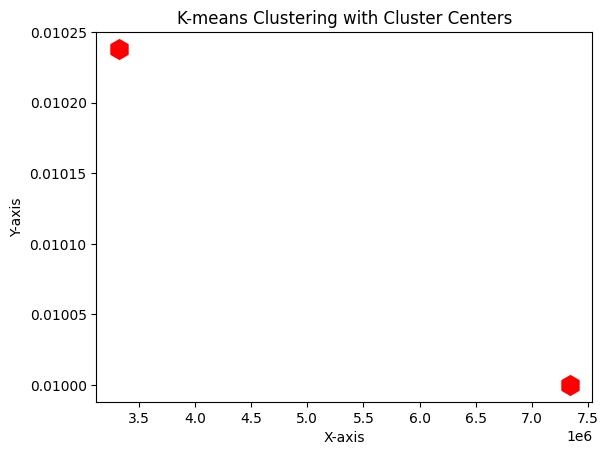

In [199]:
plt.scatter(centers[:, 0], centers[:, 1], marker='h', s=200, c='red')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-means Clustering with Cluster Centers')

# Show the plot
plt.show()

# ==========TESTING SCRATCH PAPER========

In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print(f'F1-Score: {f1:.2f}')

In [290]:
# Create a DBSCAN instance with your desired parameters
dbscan = DBSCAN(eps=0.5, min_samples=2)
# Fit the DBSCAN model to your data
dbscan.fit(numeric_columns)  # X is your data

DBSCAN(min_samples=2)

In [291]:
scaler = StandardScaler()
# Fit and transform the data
scaled_data = scaler.fit_transform(numeric_columns)

In [293]:
dbscan = DBSCAN(eps=10, min_samples=20)
# Fit DBSCAN to the scaled data
dbscan.fit(scaled_data)
# Get the cluster labels
cluster_labels = dbscan.labels_

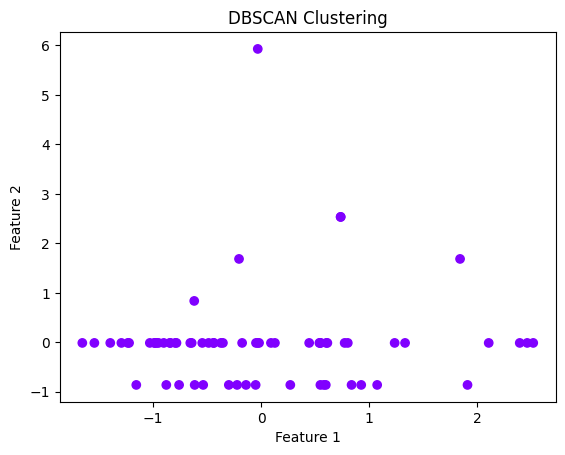

In [294]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

In [297]:
eps_values = np.linspace(.2, .15, 10.0)  # Adjust the range and granularity as needed
num_clusters = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)  # You can adjust min_samples as needed
    cluster_labels = dbscan.fit_predict(scaled_data)
    num_clusters.append(len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0))

TypeError: 'float' object cannot be interpreted as an integer

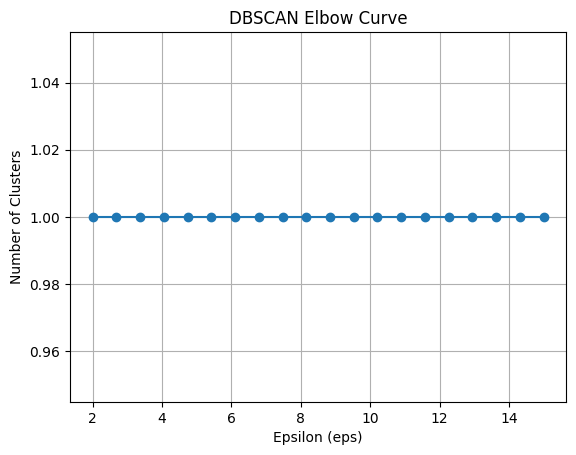

In [298]:
plt.plot(eps_values, num_clusters, marker='o')
plt.title('DBSCAN Elbow Curve')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Number of Clusters')
plt.grid(True)
plt.show()

In [275]:
from sklearn.metrics import silhouette_score
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [278]:
best_epsilon = 0
best_silhouette = -1

for epsilon in np.arange(0.1, 2.0, 10.0):
    dbscan = DBSCAN(eps=epsilon)
    dbscan.fit(scaled_data)
    labels = dbscan.labels_
    if len(set(labels)) > 1:  # Skip if all points belong to one cluster
        silhouette_avg = silhouette_score(scaled_data, labels)
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_epsilon = epsilon

In [279]:
final_dbscan = DBSCAN(eps=best_epsilon)
cluster_labels = final_dbscan.fit_predict(scaled_data)

InvalidParameterError: The 'eps' parameter of DBSCAN must be a float in the range (0.0, inf). Got 0 instead.

In [272]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [271]:
silhouette_scores = []

for epsilon in np.arange(0.1, 2.0, 0.1):
    dbscan = DBSCAN(eps=epsilon)
    labels = dbscan.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(0.1, 2.0, 0.1), silhouette_scores, marker='o')
plt.xlabel('Epsilon (Distance)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Curve for DBSCAN')
plt.grid(True)
plt.show()

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:

# Assuming you have a column named 'group' that contains the group labels
X = data.drop('group', axis=1)  # Features
y = data['group']  # Labels

# Encode the group labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)



In [1]:
/Users/akamdem/Downoads/capstone/urbanicity attributes breakdown - target


'/Users/akamdem/Documents/capstone/scored_models'

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the kNN classifier (you can adjust the number of neighbors 'n_neighbors')
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Convert the predicted labels back to original labels
y_pred = label_encoder.inverse_transform(y_pred)

# Now you have predicted labels for the test data
# You can further analyze the results, e.g., calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Assuming you have a DataFrame 'data' with the same attributes as the test data
# You can use the trained classifier to classify your 68 groups
predicted_labels = knn.predict(data.drop('group', axis=1))
predicted_labels = label_encoder.inverse_transform(predicted_labels)

# Add the predicted labels back to your DataFrame
data['predicted_group'] = predicted_labels

In [ ]:
#selecting fields for EBM modeling
numeric_columns = numeric_columns[['pop_from_web', 'Population Growth', 'Population Density',
       'Avg Household Size', 'Median Age', 'Median HHI', 'Penetration Rate',
       'SUM_Diners',
       'sept23_distinct_monthly_diners', 'sept23_total_OCP',
       'sept23_monthly_avg_dcp', 'sept23_monthly_orders',
       'sept23_monthly_avg_ocp']]

In [417]:
#initializing values for the EBM model later on
#X = df.drop('Urbanicity')
y = df['Urbanicity']
X = df.drop(columns=['sept23_total_OCP.1','sept23_monthly_avg_dcp.1'])
df = df.drop(columns=['sept23_total_OCP.1','sept23_monthly_avg_dcp.1'])
#urbanicity_attributes_breakdown
numeric_columns = df.select_dtypes(include=['float64'])
numeric_columns.columns

Index(['pop_from_web', 'Population Growth', 'Population Density',
       'Avg Household Size', 'Median Age', 'Median HHI', 'Penetration Rate',
       'SUM_Diners', 'Daytime_Population', 'sept23_population',
       'sept23_distinct_monthly_diners', 'sept23_total_OCP',
       'sept23_monthly_avg_dcp', 'sept23_monthly_orders',
       'sept23_monthly_avg_ocp', 'sept23_penetration'],
      dtype='object')

# optimize only for one centroid

In [ ]:
kmeans = KMeans(n_clusters=2, init="k-means++", random_state=42)
# Set one centroid to the first row of data
first_row = df.iloc[0].values.reshape(1, -1)
kmeans.cluster_centers_ = first_row
# Fit the model to your data
kmeans.fit(df)
# Add cluster labels to your DataFrame
df['cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroid')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with K=2')
plt.legend()
plt.show()

In [ ]:
# Initialize K-Means with K=2 clusters
kmeans = KMeans(n_clusters=2, init="k-means++", random_state=42)

# Set one centroid to the first row of data
first_row = df.iloc[0].values.reshape(1, -1)
kmeans.cluster_centers_ = first_row

# Fit the model to your data
kmeans.fit(df)

# Add cluster labels to your DataFrame
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroid')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with K=2')
plt.legend()
plt.show()

In [ ]:
# Specifying the number of clusters (2: suburban and urban)
n_clusters = 2
# Create a K-Means model
kmean = KMeans(n_clusters=n_clusters)
# Fit the model to data
kmean.fit(urban_nums)
# Add cluster labels to DataFrame
urbancents['urban_cluster'] = kmean.labels_
# now have a 'Cluster' column indicating the cluster assignments
# check the results
#urban=urban.drop(columns=['suburban_cluster'])
urban.head(2)

In [ ]:
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
                marker='+', 
                color='black', 
                s=200);
sns.scatterplot(X[:,0], X[:,1], hue=y, 
                palette=sns.color_palette("Set1", n_colors=3))